## PyTorch Workflow

Resources:
* notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version - https://www.learnpytorch.io/01_pytorch_workflow/
* Question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [182]:
What_were_covering = {1:"data (prepare and load)",
                      2:"build model",
                      3:"fitting the model to data (training)",
                      4:"making predictions and evaluating a model (inference)",
                      5:"saving and loading a model",
                      6:"putting it all together"}

What_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [183]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.3.0+cu121'

### Data Prepearing and Loading

Data E.g.:
* Images
* Videos
* Audio
* DNA
* Text

ML is game of 2 parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

In [184]:
# Create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10], len(X), len(y) # "start:end" this sign represents from "start" to "end" like here from X.begin() to 10 means first 10 elements

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

#### Spliting data into training and test sets

In [185]:
#Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [186]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":14})

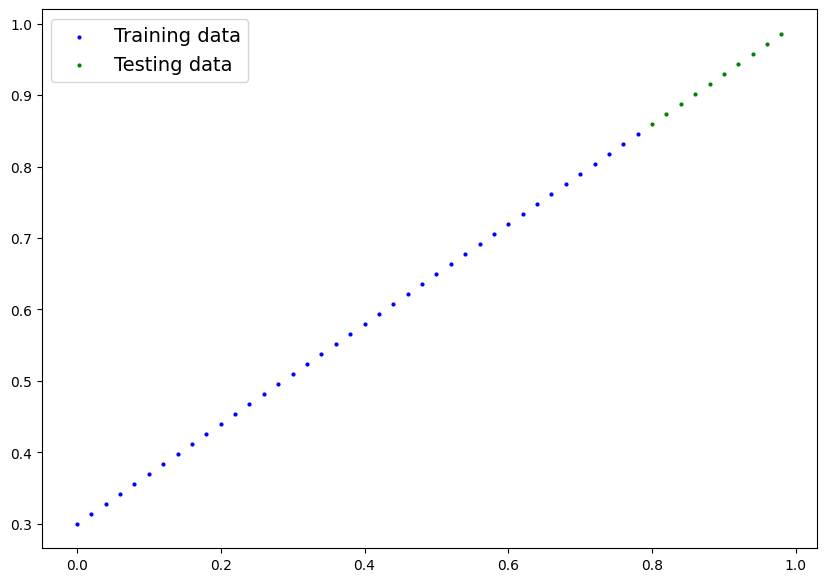

In [187]:
plot_predictions()

## 2. Build Model

what our model does:
* Start with random values (weight & bias)
*Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropogation - https://youtu.be/Ilg3gGewQ5U

In [188]:
from torch import nn
# create a linear regression model class
class LinearRegressionModel(nn.Module):# almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # Initialize model parameters
    self.weights=nn.Parameter(torch.randn(1,# start with a random weight and try to adjust it to the ideal weight
                                          requires_grad=True,# can this parameter be updated via gradient descent?
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,# start with a random weight and try to adjust it to the ideal bias
                                         dtype=torch.float))
  #Froward method to define the computation in the model to be performed at every call
  def forward(self, x:torch.Tensor)->torch.Tensor:# "x" is the input data
    return self.weights*x+self.bias #this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs(a neural network ca be considered a computational graph)
* torch.nn.Parameter - what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gardient descent.
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method define what happens in the forword computation.

### Checking the contents of our PyTorch model

So we can check our model parameters or what's inside our model using .parameters().

In [189]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

model_0, list(model_0.parameters())

(LinearRegressionModel(),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [190]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward() method.

In [191]:
y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [192]:
#Make predictions with model
with torch.inference_mode():# in inference mode grad_fn is turned off as we are doing predictions so it does not requere any gradient for it, so it reduces calculation thereby decreasing time of execution for large data
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [193]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

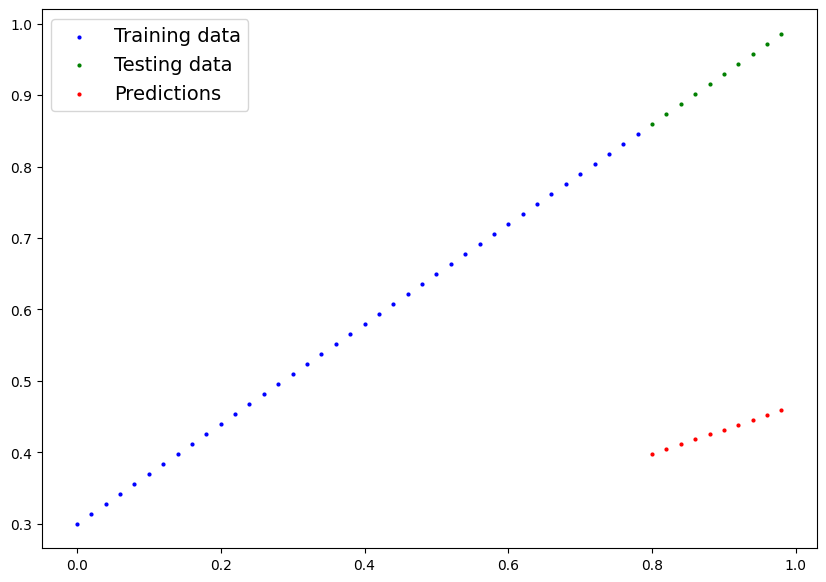

In [194]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *know* parameters.

Or in other words from a poor representation to a better representation of data.

One way to measure how poor or how wrong your models predictions  are is to use a loss function.

* Note : Loss function may be called cost function or criterion in different areas. For our case we're going to refer it as loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's prediction are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bias in our case) to improve the loss function. https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [195]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [196]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [197]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)# lr=learning rate = possibly the most important hyperparameter you can set

In [198]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SDG() will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (Binary Cross Entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of thing we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to loss (**Backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient descent**)

In [199]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [200]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [201]:
e=0

In [202]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter bcoz we've set it by ourself)
epochs = 501

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []
### Training
# Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in PyTorch sets all the parameters that require gradients to require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


  ### Testing
  model_0.eval() # turns off different setting in the model not needed for evaluation/testing (dropout/batch norm layer)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  # with torch.no_grad(): #you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:# Display information outputs
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

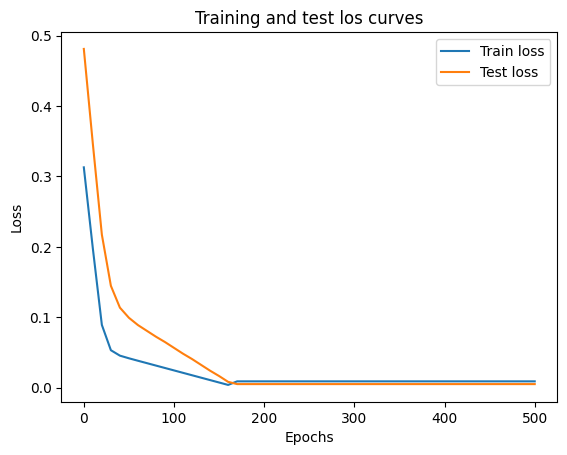

In [203]:
#plot the loss curve
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")#converted the loss_values array with tensor value in it to a numpy array
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test los curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [204]:
weight, bias # Correct parameters required

(0.7, 0.3)

In [205]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

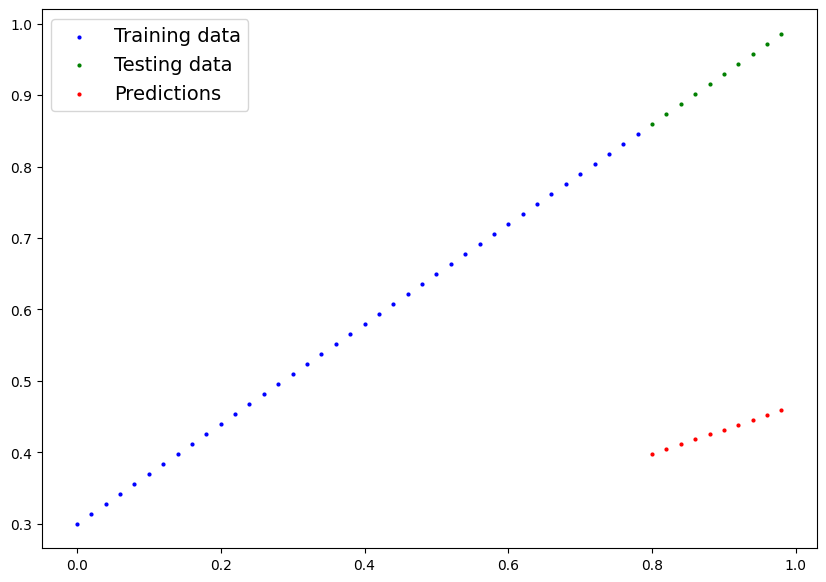

In [206]:
plot_predictions(predictions=y_preds)

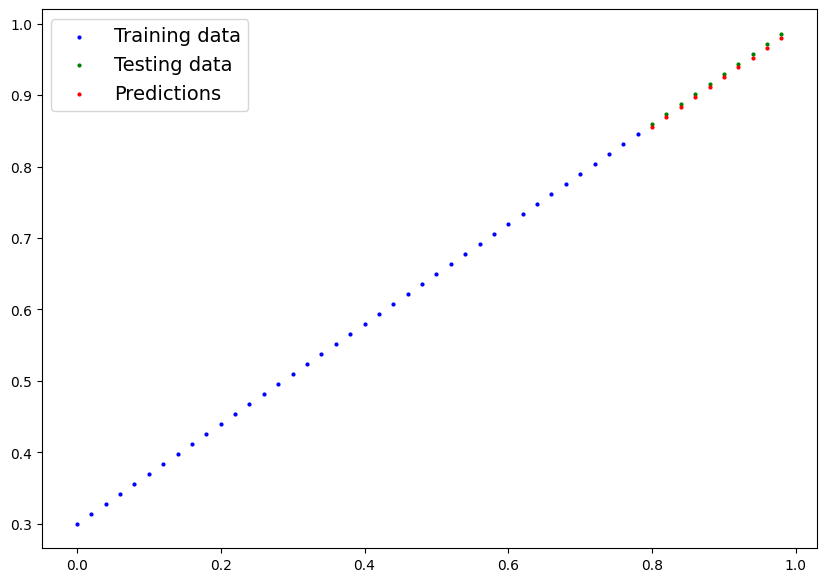

In [207]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format

2. `torch.load()` - allows you to load a saved PyTorch object

3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved dictionary

In [208]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [209]:
ls -l models

total 4
-rw-r--r-- 1 root root 1680 May 25 10:22 01_pytorch_workflow_model_0.pth


## Loading a pytorch model

Since we our model's `state_dict()` rather than entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [210]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of the model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [211]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [212]:
# Make same predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [213]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [214]:
#Compare loaded model preds with original model preds
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [215]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.3.0+cu121'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU available, the code will default to using CPU.

In [216]:
# Setup device agostic code
device =  "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [217]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 6.1 Data

In [218]:
# Create some data using the linear regression formula of y = weight * x +  bias
weight = 2
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1400],
         [0.1800],
         [0.2200],
         [0.2600],
         [0.3000],
         [0.3400],
         [0.3800],
         [0.4200],
         [0.4600]]))

In [219]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

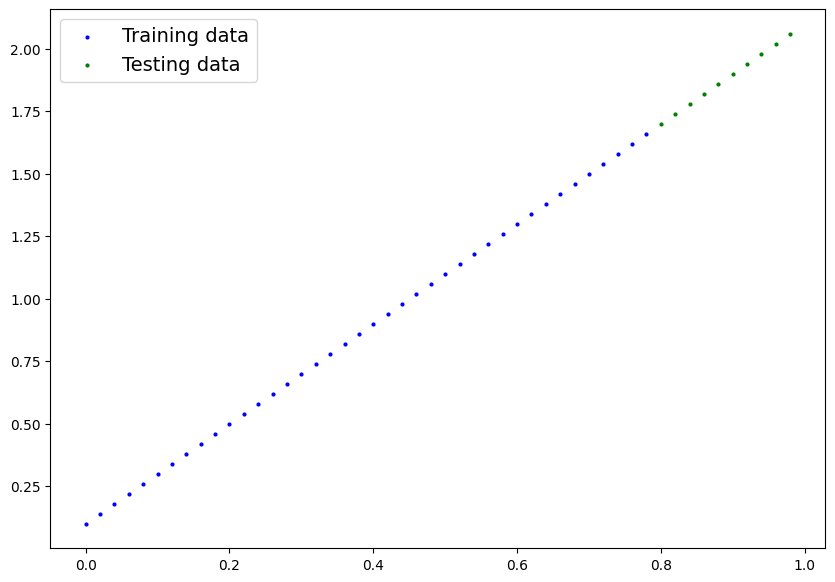

In [220]:
# Plot the data
# Note : if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [221]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [222]:
with torch.inference_mode():
  y_preds=model_1(X_test)

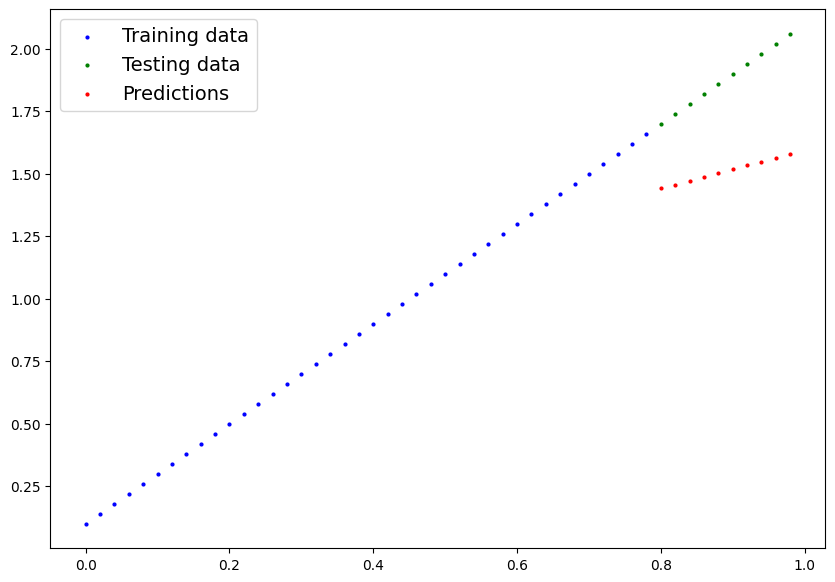

In [223]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [224]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [225]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [226]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [227]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 800

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.30940818786621094 | Test loss: 0.37495332956314087
Epoch: 10 | Loss: 0.2886516749858856 | Test loss: 0.4206458032131195
Epoch: 20 | Loss: 0.27461084723472595 | Test loss: 0.4551360011100769
Epoch: 30 | Loss: 0.26467710733413696 | Test loss: 0.48008260130882263
Epoch: 40 | Loss: 0.25743526220321655 | Test loss: 0.4970729351043701
Epoch: 50 | Loss: 0.2516745924949646 | Test loss: 0.5083540081977844
Epoch: 60 | Loss: 0.24652239680290222 | Test loss: 0.5167983770370483
Epoch: 70 | Loss: 0.24239544570446014 | Test loss: 0.5196053385734558
Epoch: 80 | Loss: 0.23826853930950165 | Test loss: 0.5224123597145081
Epoch: 90 | Loss: 0.23442327976226807 | Test loss: 0.5217402577400208
Epoch: 100 | Loss: 0.23089516162872314 | Test loss: 0.5175889730453491
Epoch: 110 | Loss: 0.2273670732975006 | Test loss: 0.5134377479553223
Epoch: 120 | Loss: 0.2238389551639557 | Test loss: 0.5092864632606506
Epoch: 130 | Loss: 0.22031085193157196 | Test loss: 0.5051352381706238
Epoch: 140 | Loss: 

In [228]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.9961]])),
             ('linear_layer.bias', tensor([0.1060]))])

In [229]:
weight, bias

(2, 0.1)

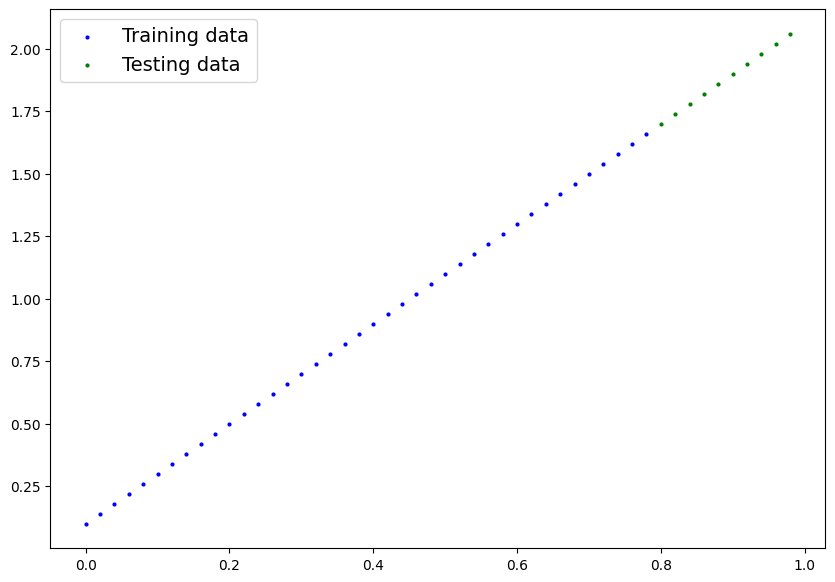

In [230]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None)

In [231]:
#Turn model into evaluation mode
model_1.eval()
with torch.inference_mode():# in inference mode grad_fn is turned off as we are doing predictions so it does not requere any gradient for it, so it reduces calculation thereby decreasing time of execution for large data
  y_preds_new = model_1(X_test)

y_preds_new

tensor([[1.7029],
        [1.7428],
        [1.7828],
        [1.8227],
        [1.8626],
        [1.9025],
        [1.9425],
        [1.9824],
        [2.0223],
        [2.0622]])

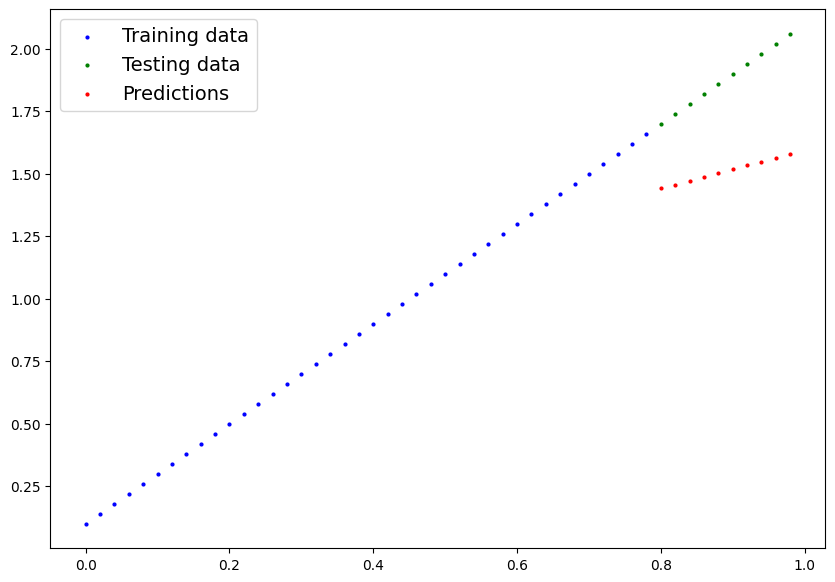

In [232]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

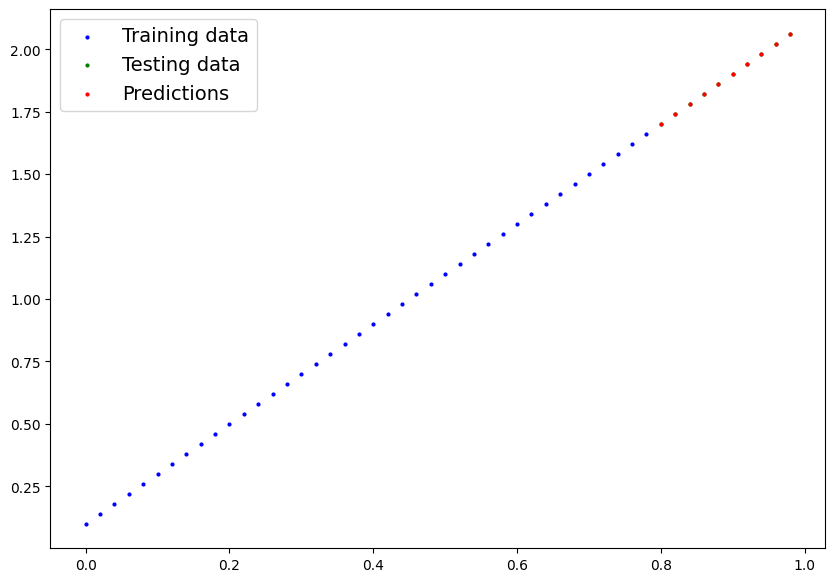

In [233]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds_new)

### 6.5 Saving & loading a trained model

In [239]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [238]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.9961]])),
             ('linear_layer.bias', tensor([0.1060]))])

In [246]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict of the model_0 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [247]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [248]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.9961]])),
             ('linear_layer.bias', tensor([0.1060]))])

In [249]:
model_1.eval()
with torch.inference_mode():
  loaded_model_1_y_preds=model_1(X_test)

In [250]:
loaded_model_1_y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Exercise and Extra-curriculum

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
strat=0
end=1
step=0.01
weight=0.3
bias=0.9
X=torch.arange(strat,end,step)
y=weight*X + bias
X,y

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
         0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
         0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
         0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
         0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
         0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
         0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
         0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
         0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
         0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
         0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
         0.9900]),
 tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
         

In [5]:
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test=X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([80]), torch.Size([80]), torch.Size([20]), torch.Size([20]))

In [22]:
def plot_prediction(X_train,y_train, X_test, y_test, predictions=None):
  plt.scatter(X_train,y_train,c="b",s=4,label="Train Data")
  plt.scatter(X_test,y_test,c="g",s=4,label="Test Data")
  if(predictions is not None):
    plt.scatter(X_test,predictions,c="r",s=4,label="Predictions")
  plt.legend()

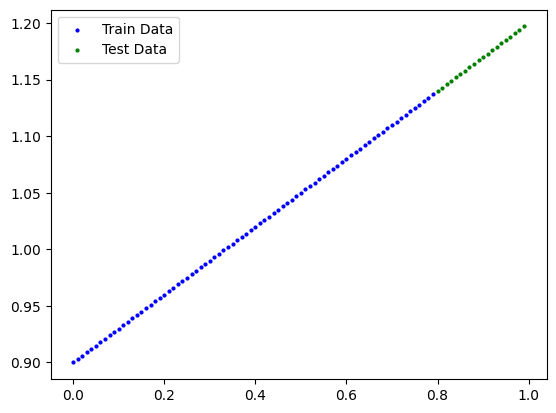

In [23]:
plot_prediction(X_train,y_train, X_test, y_test)

In [8]:
from torch import nn
class LR(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weight*x+self.bias

In [9]:
model_ex=LR()
model_ex.state_dict()

OrderedDict([('weight', tensor([0.8090])), ('bias', tensor([-1.7942]))])

In [10]:
with torch.inference_mode():
  y_pred=model_ex(X_test)

In [11]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_ex.parameters(),
                          lr=0.01)

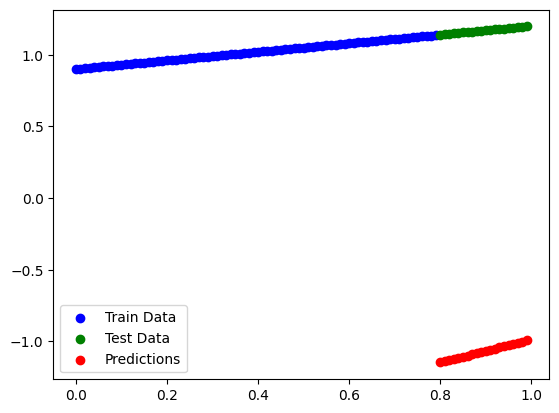

In [12]:
plot_prediction(X_train,y_train, X_test, y_test,y_pred)

In [17]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1800

for epoch in range(epochs):
  model_ex.train()
  y_pred=model_ex(X_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_ex.eval()
  with torch.inference_mode():
    test_pred=model_ex(X_test)
    test_loss=loss_fn(test_pred, y_test)

    if(epoch%10==0):
      print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.029745131731033325 | Test Loss: 0.06945779174566269
Epoch: 10 | Train Loss: 0.026319047436118126 | Test Loss: 0.06146597862243652
Epoch: 20 | Train Loss: 0.022893931716680527 | Test Loss: 0.05313023179769516
Epoch: 30 | Train Loss: 0.019467847421765327 | Test Loss: 0.045138418674468994
Epoch: 40 | Train Loss: 0.01604175940155983 | Test Loss: 0.037146616727113724
Epoch: 50 | Train Loss: 0.012616651132702827 | Test Loss: 0.028810864314436913
Epoch: 60 | Train Loss: 0.009190564975142479 | Test Loss: 0.02081906795501709
Epoch: 70 | Train Loss: 0.005764481611549854 | Test Loss: 0.012827265076339245
Epoch: 80 | Train Loss: 0.0023425393737852573 | Test Loss: 0.005186176393181086
Epoch: 90 | Train Loss: 0.005894506815820932 | Test Loss: 0.009475541301071644
Epoch: 100 | Train Loss: 0.005894506815820932 | Test Loss: 0.009475541301071644
Epoch: 110 | Train Loss: 0.005894506815820932 | Test Loss: 0.009475541301071644
Epoch: 120 | Train Loss: 0.005894506815820932 | Test Lo

In [18]:
with torch.inference_mode():
  y_pred=model_ex(X_test)

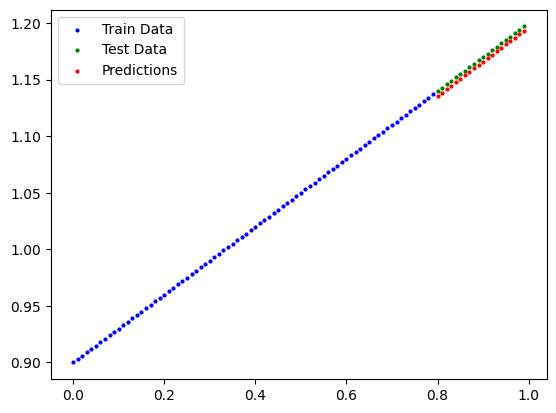

In [24]:
plot_prediction(X_train,y_train, X_test, y_test,y_pred)

In [20]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="model_ex.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_ex.state_dict(),
           f=MODEL_SAVE_PATH)

In [21]:
loaded_model_ex = LR()
loaded_model_ex.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_ex.state_dict()

OrderedDict([('weight', tensor([0.3037])), ('bias', tensor([0.8927]))])

In [25]:
with torch.inference_mode():
  y_pred=loaded_model_ex(X_test)

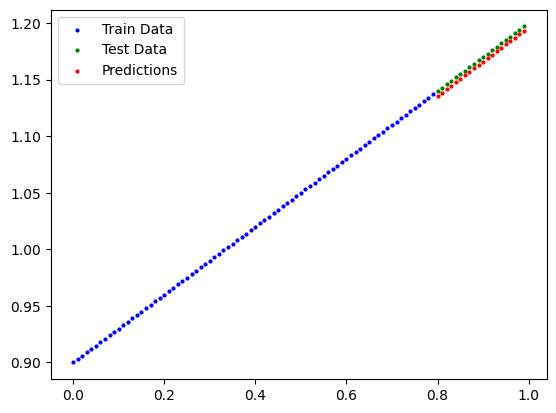

In [26]:
plot_prediction(X_train,y_train, X_test, y_test,y_pred)